# 2) Salary_hike -> Build a prediction model for Salary_hike

## 1. Importing Libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

## 2. Importing Data

In [58]:
data=pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## 3. Data Understanding

In [59]:
print("Total Observations :{}\nTotal Features :{}".format(data.shape[0],data.shape[1]))

Total Observations :30
Total Features :2


In [60]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [61]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [62]:
data.describe(include="all")

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## 4. Checking for the assumptions

Text(0, 0.5, 'Salary')

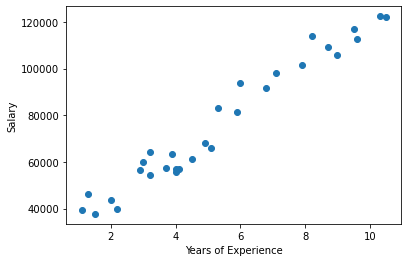

In [63]:
plt.scatter(x=data["YearsExperience"],y=data["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

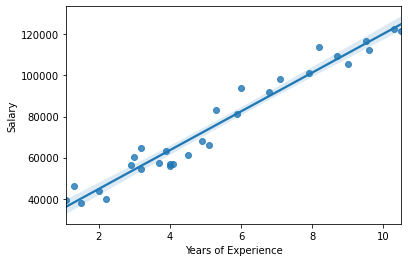

In [64]:
sns.regplot(x=data["YearsExperience"],y=data["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

#### -->Shows some linearity and no outliers.
#### --> No multicollinearity
#### --> No auto-regression

## 5. Data Preparation

In [65]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [66]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

## 6. Model Building

In [67]:
model=smf.ols(formula="Salary~YearsExperience",data=data).fit()

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        01:58:03   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [70]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

## 8. Model prediction

###### Manual calculation

In [89]:
#if years_of_experience=5 and 9, what will be the predicted Salary respectively?
#y=mx+c
#(9449.962321*5)+25792.200199    -->73042.01
#(9449.962321*9)+25792.200199     -->110841.86

###### Machine Calculation

In [77]:
new_data=pd.Series([5,9])
new_data

0    5
1    9
dtype: int64

In [78]:
pred_data=pd.DataFrame(new_data,columns=["YearsExperience"])
pred_data

,YearsExperience
0,5
1,9


In [79]:
model.predict(pred_data)

0     73042.011806
1    110841.861092
dtype: float64

##  9. Model Deployment

In [92]:
from pickle import dump
dump(model,open("model.pkl","wb"))